In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

'modules have been imported!'

'modules have been imported!'

# Importing dataset and creating the DataFrame

In [2]:
data = pd.read_csv('churn_prediction.csv')
'DataFrame created!'

'DataFrame created!'

In [3]:
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


## Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers

<b>customer_id</b> - Customer id

<b>vintage</b> - Vintage of the customer with the bank in number of days

<b>age</b> - Age of customer

<b>gender</b> - Gender of customer

<b>dependents</b> - Number of dependents

<b>occupation</b> - Occupation of the customer 

<b>city</b> - City of customer (anonymised)


### Customer Bank Relationship


<b>customer_nw_category</b> - Net worth of customer (3:Low 2:Medium 1:High)

<b>branch_code</b> - Branch Code for customer account

<b>days_since_last_transaction</b> - No of Days Since Last Credit in Last 1 year


### Transactional Information

<b>current_balance</b> - Balance as of today

<b>previous_month_end_balance</b> - End of Month Balance of previous month


<b>average_monthly_balance_prevQ</b> - Average monthly balances (AMB) in Previous Quarter

<b>average_monthly_balance_prevQ2</b> - Average monthly balances (AMB) in previous to previous quarter

<b>current_month_credit</b> - Total Credit Amount current month

<b>previous_month_credit</b> - Total Credit Amount previous month

<b>current_month_debit</b> - Total Debit Amount current month

<b>previous_month_debit</b> - Total Debit Amount previous month

<b>current_month_balance</b> - Average Balance of current month

<b>previous_month_balance</b> - Average Balance of previous month

<b>churn</b> - Average balance of customer falls below minimum balance in the next quarter (1/0)

## Hypotheses
### Hypotheses on demographic information of coutomers

1. customer_id : It won't be too helpful beacuse it's just a nominal categorical data and doesn't have any relation with the coustomer.
2. vintage : Generally we can conclude that greater the value of vintage lesser probability of churn, but after a certain cutoff this hypothesis may not be satisfied!
3. Age : The customers having comparatively lower age may churn on the other hand customers of middle age or higher age have lesser probability of churn!
4. Gender : It'll play important role in prediction, we may notice a difference between the distribution on the basis of gender.
5. dependents : It'll play an important role.
6. occupation : We may be sure of that this feature may play as one of the most vital role. In general companies are prone to churn, on the other hand self-employed should have a higher probability to churn. Students and customers from other profession will have mediocre probability of churn.
7. city : It's a nominal categorical feature, but it may play a very important role. Certain cities should have comparatively high number of customer who are less prone to churn and viceversa. Depending on the city, we can make a wild guess if a customer belonging from that specific city will be prone to churn or not.

## Customer Bank Relationship:
1. customer_nw_category : It's already label encoded feature. Ordinal categorical data in nature. Customers with high networth in a/c are less prone to churn and viceversa.
2. branch_code : Same as 'city' feature
3. day_since_last_transaction : Higher the value more prone to churn

## Transactional Information:
1. current_balance : Obviously, the current balance is indicator of churn, higher the value lesser prone to churn
2. previous_month end_balance : Same as current_balance
3. average_monthly_balance_prevQ : Same as current_balance
4. average_monthly_balance_prevQ2 : Same as current_balance
5. current_month_credit : same as current_balance
6. previous_month_credit : same as current_balance
7. current_month_debit : same as current_balance
8. previous_month_debit : same as cuurent_balance
9. current_month_balance : same as current_balance
10. previous_month_balance : same as current_balance

# Data Exploration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [5]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

* Hence, we can see the presence of missing values(understandable by pandas, item non-response)

## Seggregating variables into groups


In [6]:
customer_details = ['customer_id','age','vintage']
current_details = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_details = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']

In [7]:
# Custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
    '''
    Univariate_Analysis_numeric
    takes a group of variables (Integer and Float)
    and plot/print all the descriptives and properties along with kde
     runs a loop: calculate all the descriptive of i(th) variable and plot
     /print it.
     
    '''
    
    size = len(var_group)
    plt.figure(figsize=(7*size,3), dpi=120)
    
    #looping over each feature
    for j,i in enumerate(var_group):
        
        #calucations of descriptives of variables
        minm = data[i].min()
        maxm = data[i].max()
        ran = maxm - minm
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()
        
        
        #calculation of points of inflection
        points = mean-st_dev, mean+st_dev
        
        #plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.kdeplot(data[i], shade=True)
        sns.scatterplot([minm,maxm],[0,0], color='blue', label='max/min' )
        sns.scatterplot([mean],[0], color='orange', label='mean')
        sns.scatterplot([median],[0],color='green', label='median')
        sns.scatterplot(points,[0,0], color='pink', label='points of inflection')
        plt.xlabel(f'{i}')
        plt.ylabel('Density')
        plt.title(f'std_dev={(round(points[0],2),round(points[1],2))}; range={round(ran,2)};\nskewness={round(skew,2)}; kurtosis={round(kurt,2)};\nmean={round(mean,2)}; median={round(median,2)}')

## Customer Information

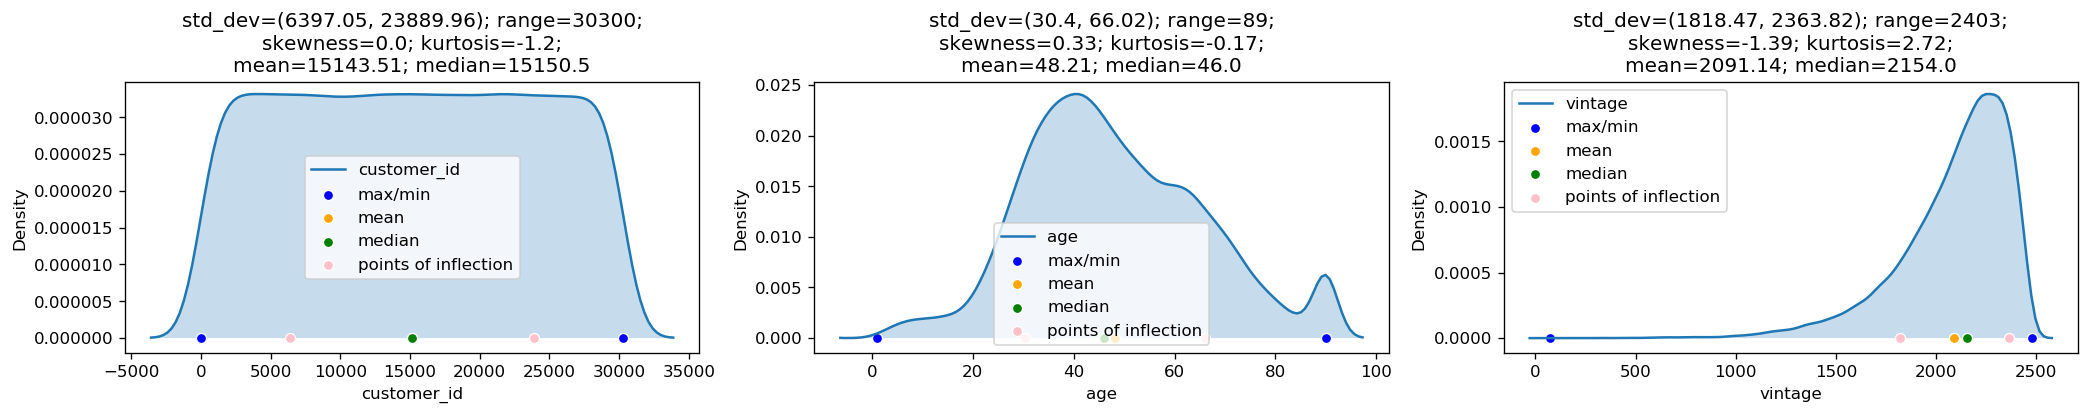

In [8]:
UVA_numeric(data, customer_details)

## Summary of Customer Information

* **customer_id** :
    * The variable is unique for every customer, Hence uniform distribution.
    * This variables doesn't contribute any information
    * Can be eliminated from data
    
* **age** :
    * Median Age = 46
    * **Most of the customer age between 30 to 66**
    * skewness = 0.33; customers' ages are slightly bised towards the younger age
    * kurtosis = -0.17; very less likely to have extreme/outlier values
    
* **vintage** :
    * Most of the customers have joined before 1800 to 2400 days before the data extraction.
    * skewness = -1.39; vintage feature is highly biased to the longer association of customers
    * kurtosis = 2.93; Extreme values and outilers are very likely to be present in vintage.
    
**Things to Investigate Further Down the Road**:
* The batch of **high number of old age customers** in age variable

## Current Details

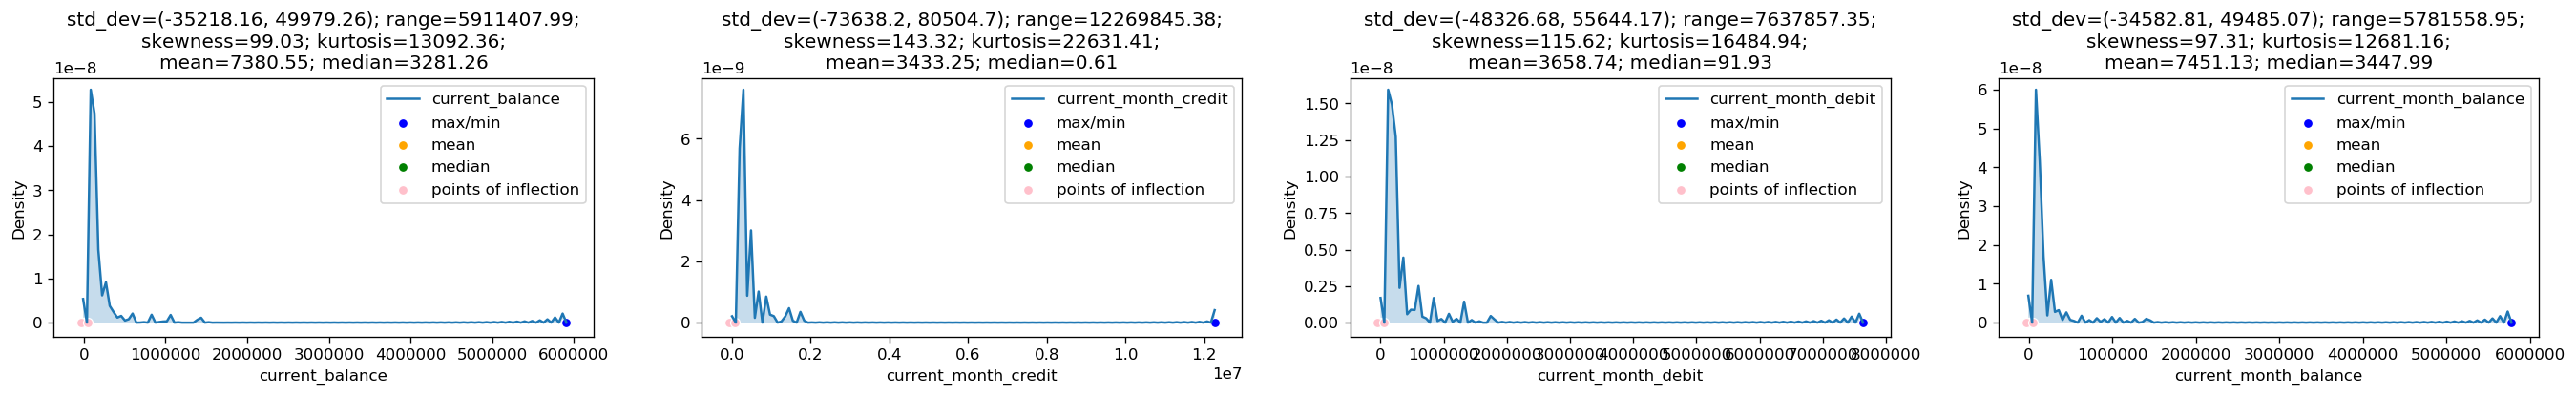

In [9]:
UVA_numeric(data, current_details)

## Summary
Cinsidering the **kurtosis**, **skewness** values, we can conclude **the presence of outliers and data is biased towards the lower values**.

## Previous Details

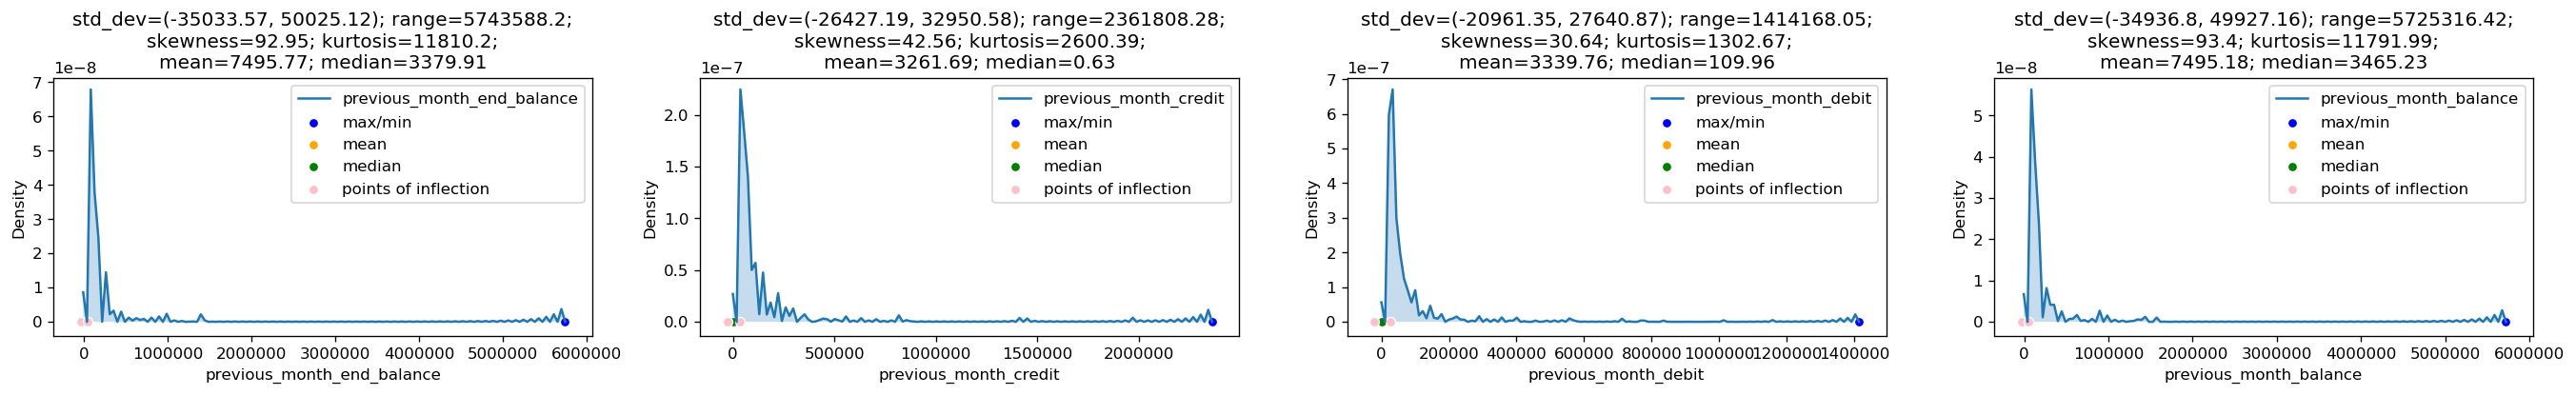

In [10]:
UVA_numeric(data,previous_details)

## Summery of Previous Month Details
* Observing the **skewness** and **kurtosis** of the data, we can conclude that the data has outliers and it's biased to the lower values.

**Considering** the **current_details** and **previous_details**, we can observe a trend that **few customers have comparatively higher balance in a/c, higher transactions like credit and debit from the same a/c**. These customers are working as the outliers but **most of the customers perform low amount transactions**

## Previous Quarters

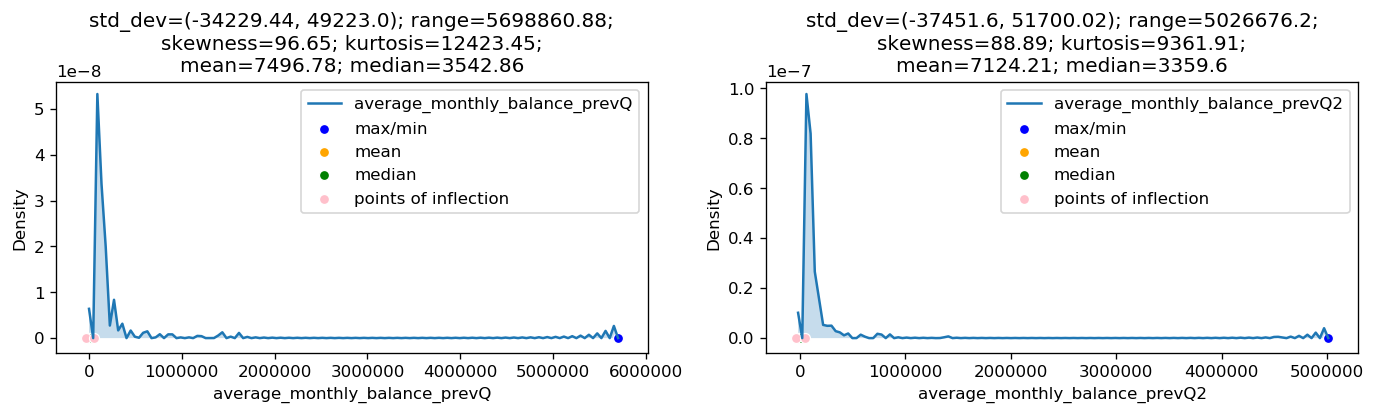

In [11]:
UVA_numeric(data,previous_quarters)

## Summary of Previous Quarters
* Both the quarters are showing similar trend. Hence, we can conclude the customers are on an average consistent. 

## Transaction Date

The <b>'last_transaction'</b> feature can't be used directly in the model, hence we need to generate new feature from this. Days since last transaction obtained from the difference the transaction date and today's date, will give use important numerical data that can be used in the model directly.

In [12]:
def day_counter(value):
    '''
    This function takes date in a string format and returns 
    the total number of days from that day to today
    In case of NaT values, it returns 758 days
    In this function, customers having no record of transaction and having 
    record of transaction too many days ago are given the same significance
    '''
    from datetime import datetime
    if value == 'NaT':
        return 758
    else:
        return (datetime.today()-datetime.strptime(value, '%Y-%m-%d')).days

In [13]:
data['days_since_last_transaction'] = data['last_transaction'].map(day_counter)

We can extract the <b>day of the year</b>, <b>week of the year</b>, <b>month</b>, <b>week of the year</b> from the feature <b>last_transaction</b> to visualize valuable insights.

In [14]:
# extracting new columns from 'last_transaction'
date = pd.DatetimeIndex(data['last_transaction'])
data['doy_lst_tran'] = date.dayofyear
data['woy_lst_tran'] = date.weekofyear
data['moy_lst_tran'] = date.month
data['dow_lst_tran'] = date.dayofweek

In [15]:
# Checking new extracted columns using datetime
data[['last_transaction','doy_lst_tran','woy_lst_tran','moy_lst_tran','dow_lst_tran']].head()

,last_transaction,doy_lst_tran,woy_lst_tran,moy_lst_tran,dow_lst_tran
0,2019-05-21,141.0,21.0,5.0,1.0
1,2019-11-01,305.0,44.0,11.0,4.0
2,NaT,NaN,NaN,NaN,NaN
3,2019-08-06,218.0,32.0,8.0,1.0
4,2019-11-03,307.0,44.0,11.0,6.0


The first column is the complete date of the last transaction which was done by the any given customer.

The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done.

**Breaking down the date variable** into these granular information will **help us in understand when the last transaction was done from different perspectives**

In [16]:
UVA_numeric(data, transaction_date)

NameError: name 'transaction_date' is not defined

## Summary :
* **Day of Year** : 
    * Most of the last transactions were made in the last the last 60 days of extraction of data
    * There are transactions which were made also an year ago
* **Week of Year and Month of Year** : These variable validate the finding from the day of year
    * **Day_of_Week**: Tuesdays are often the favoured day relative to others.
**Things to Investigate**: 
    * Customers whose last transaction was 6 months ago, did all of thrm churn?
    
## Univariable Analysis: Categorical Variables

In [17]:
cat_col = ['gender','occupation','city','customer_nw_category','branch_code','churn']
data[cat_col] = data[cat_col].astype('category')

In [18]:
data.select_dtypes(exclude=['int64','float64','Int64','object']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [19]:
# custom function for easy visualisation of categorical variables

def UVA_category(data, var_group):
    '''
    Univariate_Analysis_category
    Takes a list of category and a dataframe
    prints/plots all value_counts and barplot
    '''
    # setting figsize
    size = len(var_group)
    plt.figure(figsize=(9*size,5), dpi=120)
    
    for j,i in enumerate(var_group):
        #for counting the unique values
        norm_count = data[i].value_counts(normalize=True)
        n_uni = data[i].nunique()

        #plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(norm_count, norm_count.index, order=norm_count.index)
        plt.xlabel('Fraction/percent',fontsize=20)
        plt.ylabel(f'{i}',fontsize=10)
        plt.title(f'n_uniques={n_uni}\nvalue_counts={norm_count}')

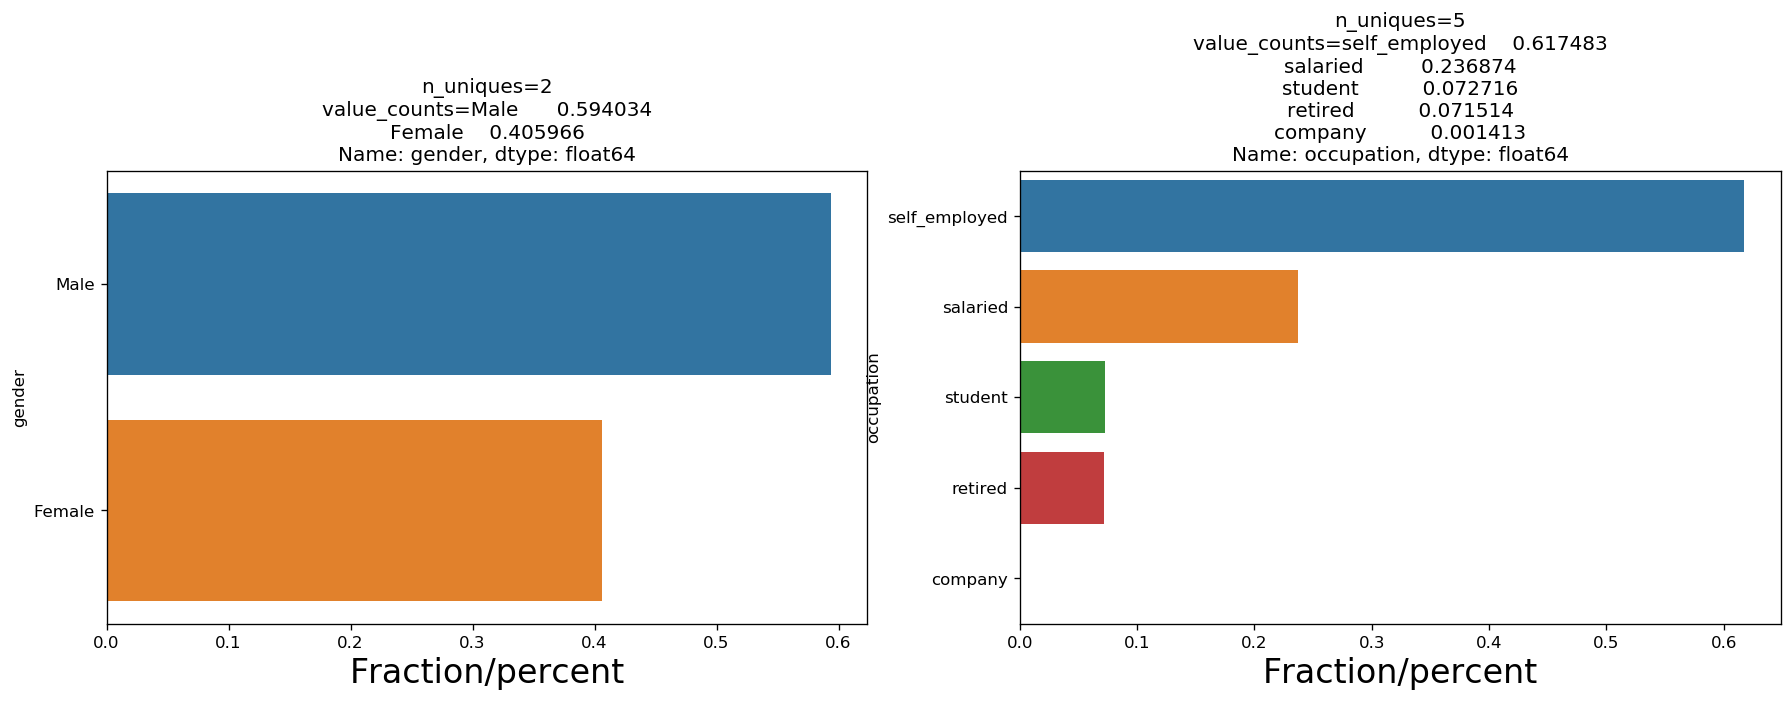

In [20]:
UVA_category(data,cat_col[:2])

## Summary:
* Gender: The quantity of the male is 1.5 times of the female 
* Occupation: 
    * Most of the customers are **self_employed**.
    * There are extremely few company accounts. This fact may explain the presence of outliers in the distribution of numerical columns

* **Things to Investigate**:
    * Company accounts are the reason behind the outlier transactions.
    * Customers belonging to highest networth vategory may explain the skewness of the transactions.

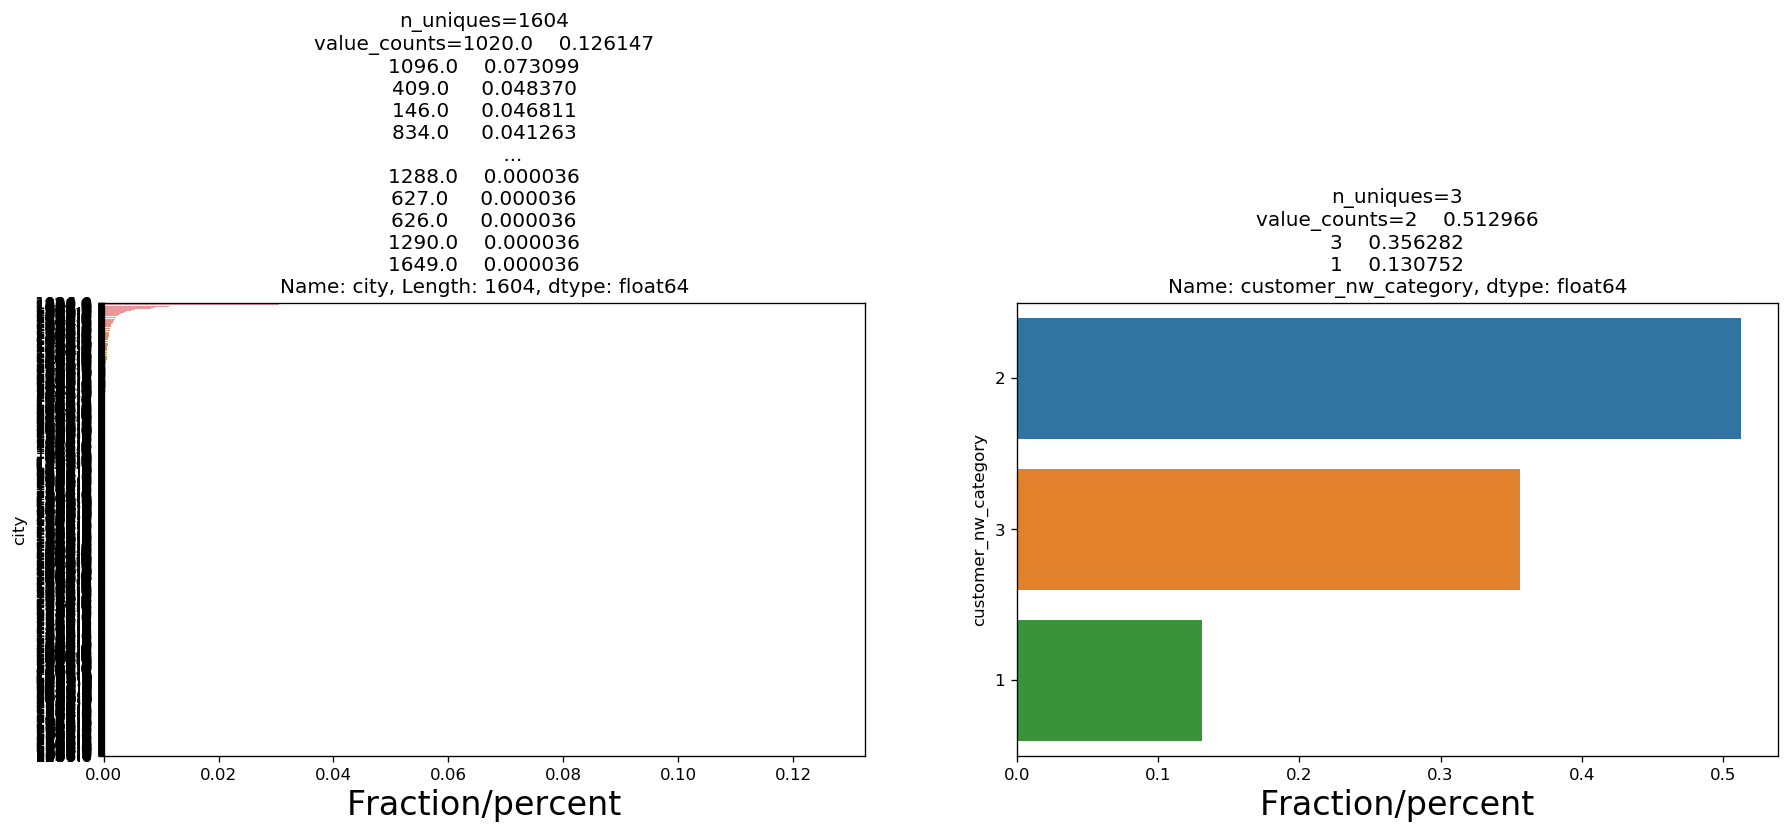

In [21]:
UVA_category(data,cat_col[2:4])

## Summary:
* **City**: Some city are popular among the customers or it may be a reason the population is comparatively higher than other cities.
* **customer_nw_category**: 
    * It's obvious that more than 50% customers have medium net worth in their account.

* **Things to Investigate**:
    * Customers belonging to the highest net worth category may explain the skewness of the transaction.
    * Customer belonging very cities may lead to churn.

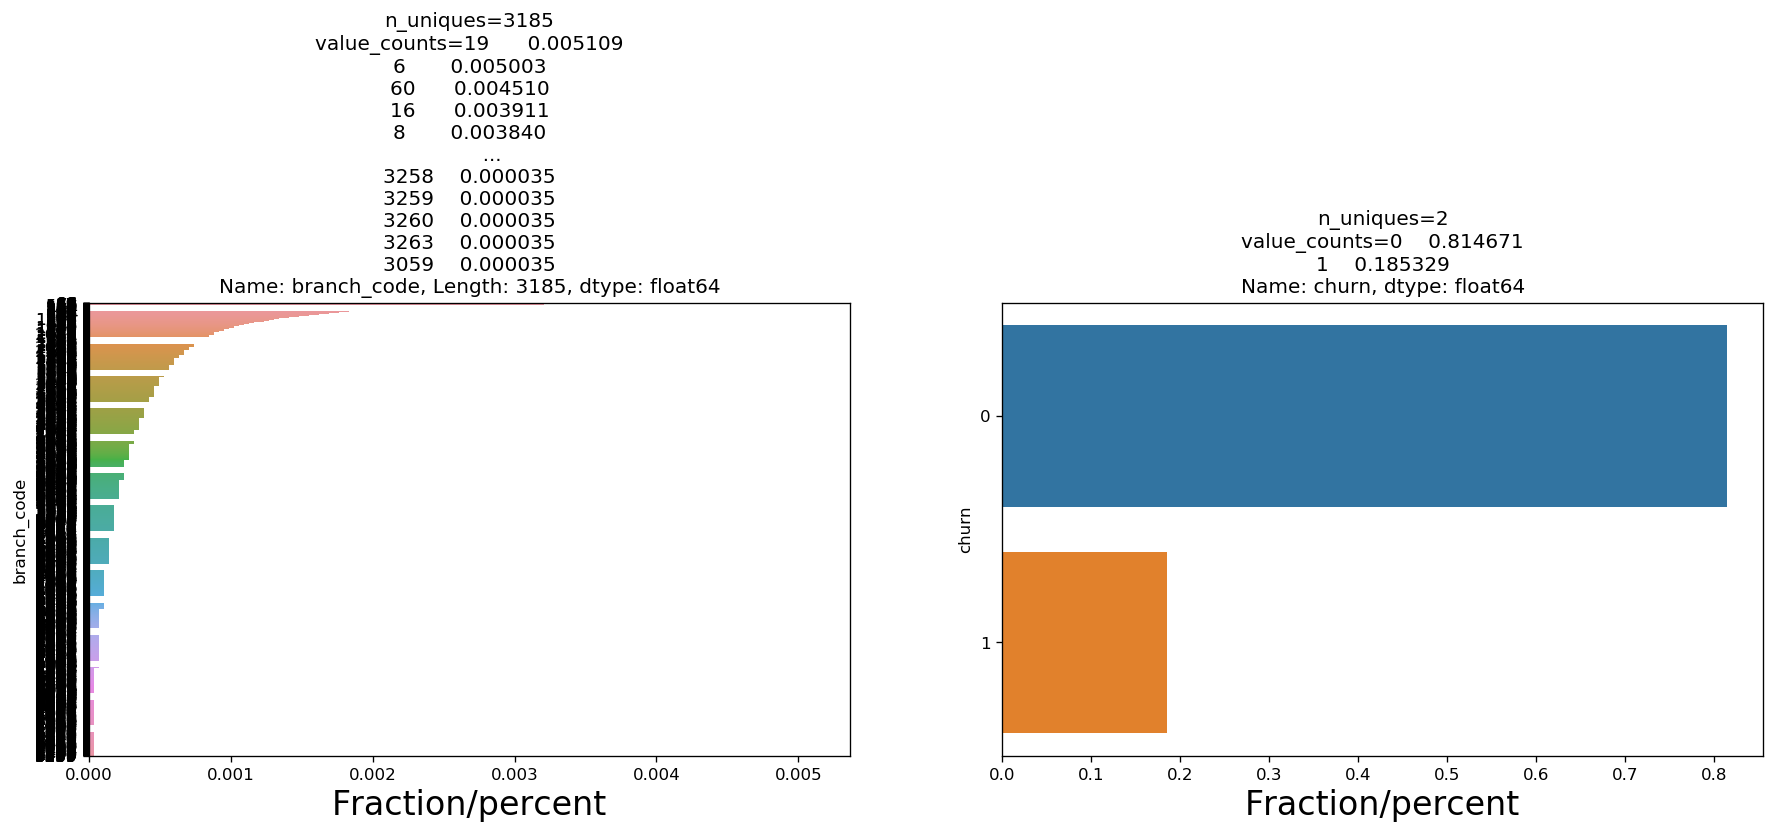

In [22]:
UVA_category(data,cat_col[4:])

## Summary:
* **branch_code**: Same as **city**
* **churn**: The number of people who churn, is almost 19% of the total population.

## Investigation directions from Univariate Analysis
1. **customer_id** variable can be dropped!
2. Is there any common trait/relation between the customers who are performing high transaction credit/debits?
    * **customer_nw_category** might explain that
    * **occupation** might explain them
    * **popular cities** might explain these
3. Customers whose last transaction was 6months ago, did all of them churn?
4. Possibility that cities and branch code with very few accounts may lead to churn!

## Univariate: Missing Values

In [23]:
# finding number of missing values in every variable
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
days_since_last_transaction          0
doy_lst_tran                      3223
woy_lst_tran                      3223
moy_lst_tran                      3223
dow_lst_tran             

**Things to investigate further down:**
*    Gender: Do the customers with missing gender values have some common behaviour in-
  * churn: do missing values have any relation with churn?

* Dependents:
 * Missing values might be similar to zero dependents
 * churn: do missing values have any relation with churn?

* Occupation:
 * Do missing values have similar behaviour to any other occupation
 * do they have some relation with churn?

* city:
  * the respective cities can be found using branch_code

* last_transaction:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

* For almost all the above:

  * vintage: might be recording errors from same period of joining
  * branch_code: might be recording error from certain branch


## Univariate Analysis: Outliers

**We suspected outliers in current_month and previous_month variable groups. We will verify that using bo plots**

In [24]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boxplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

## current_month & previous_month

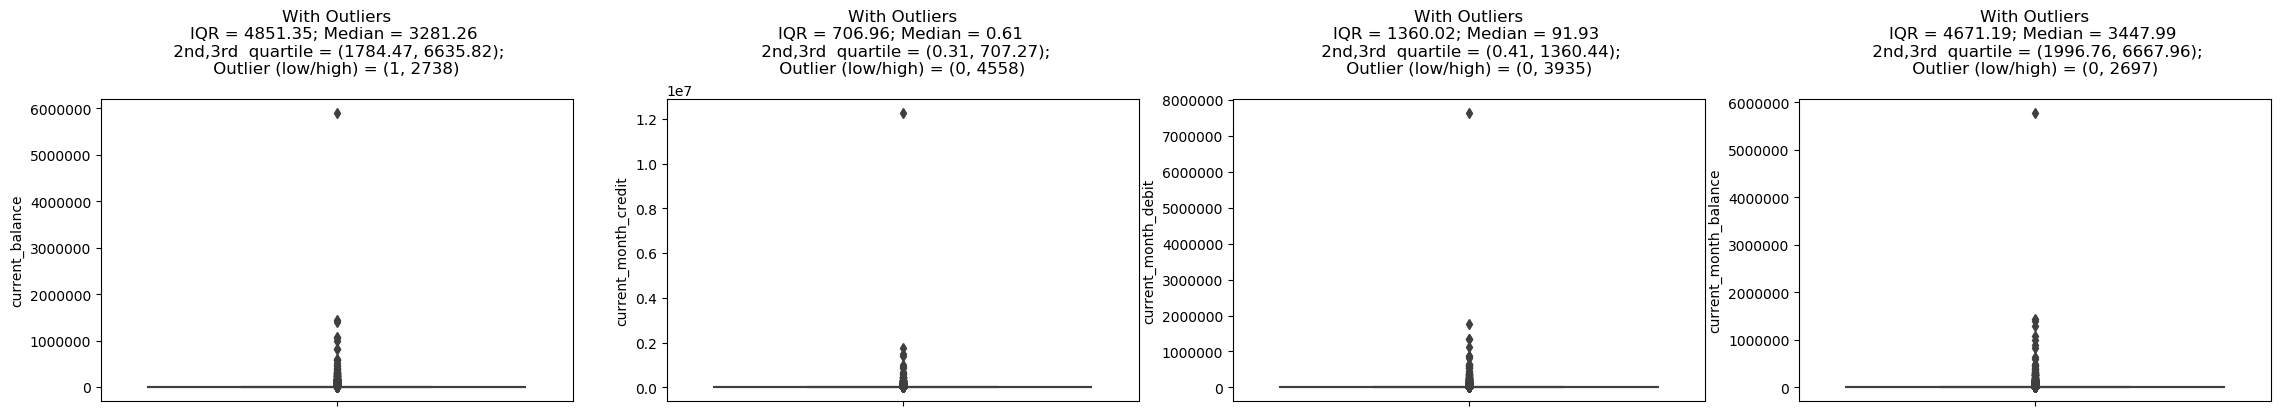

In [25]:
UVA_outlier(data, current_details,)

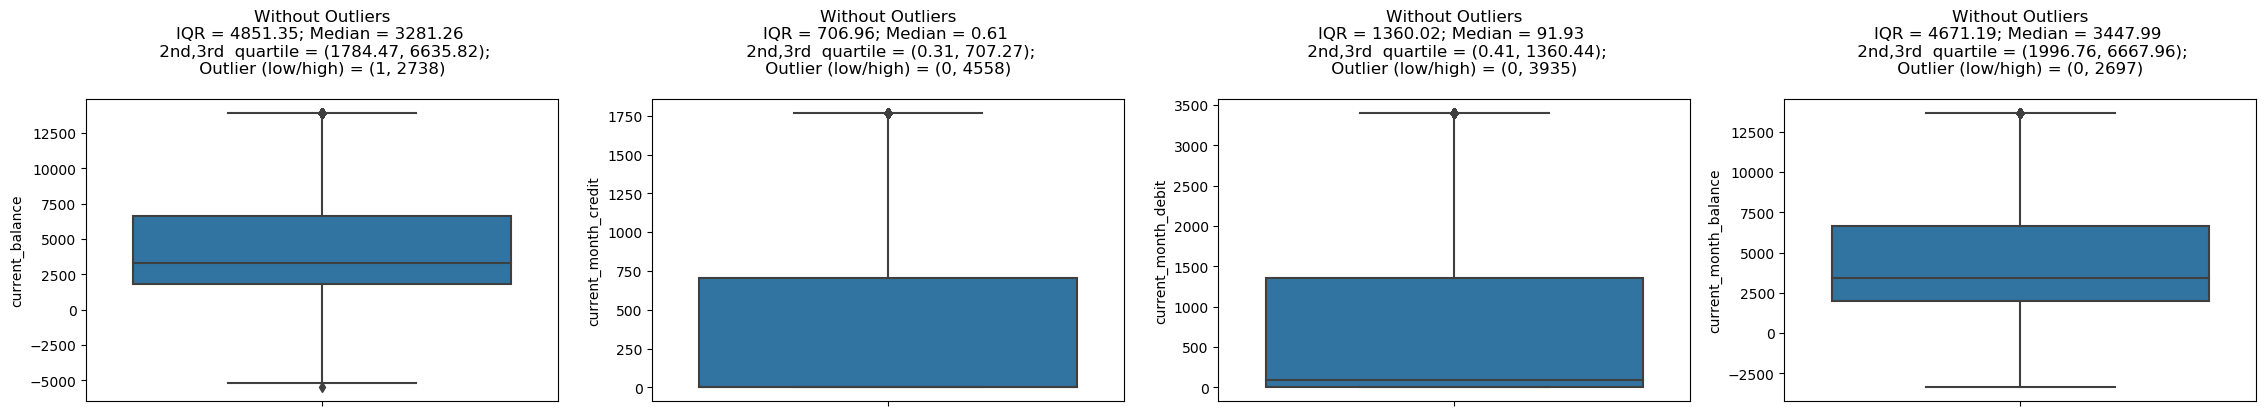

In [26]:
UVA_outlier(data, current_details, include_outlier=False)

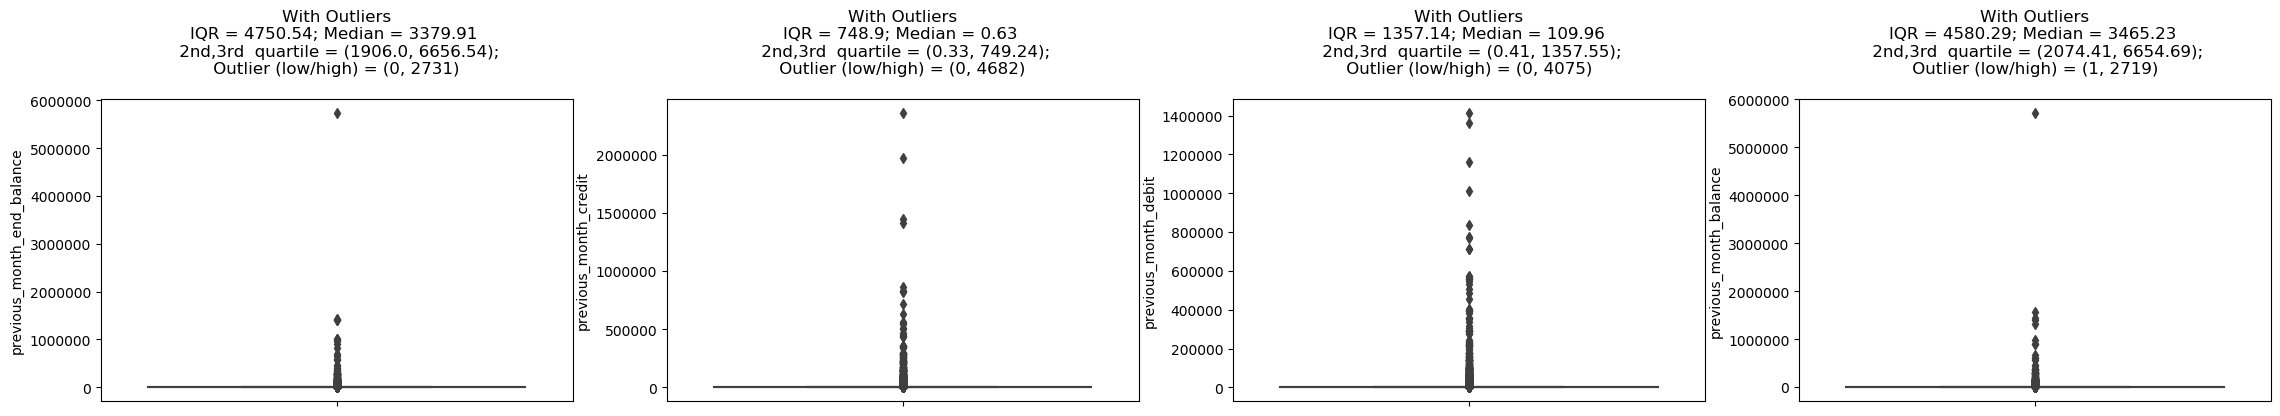

In [27]:
UVA_outlier(data, previous_details,)

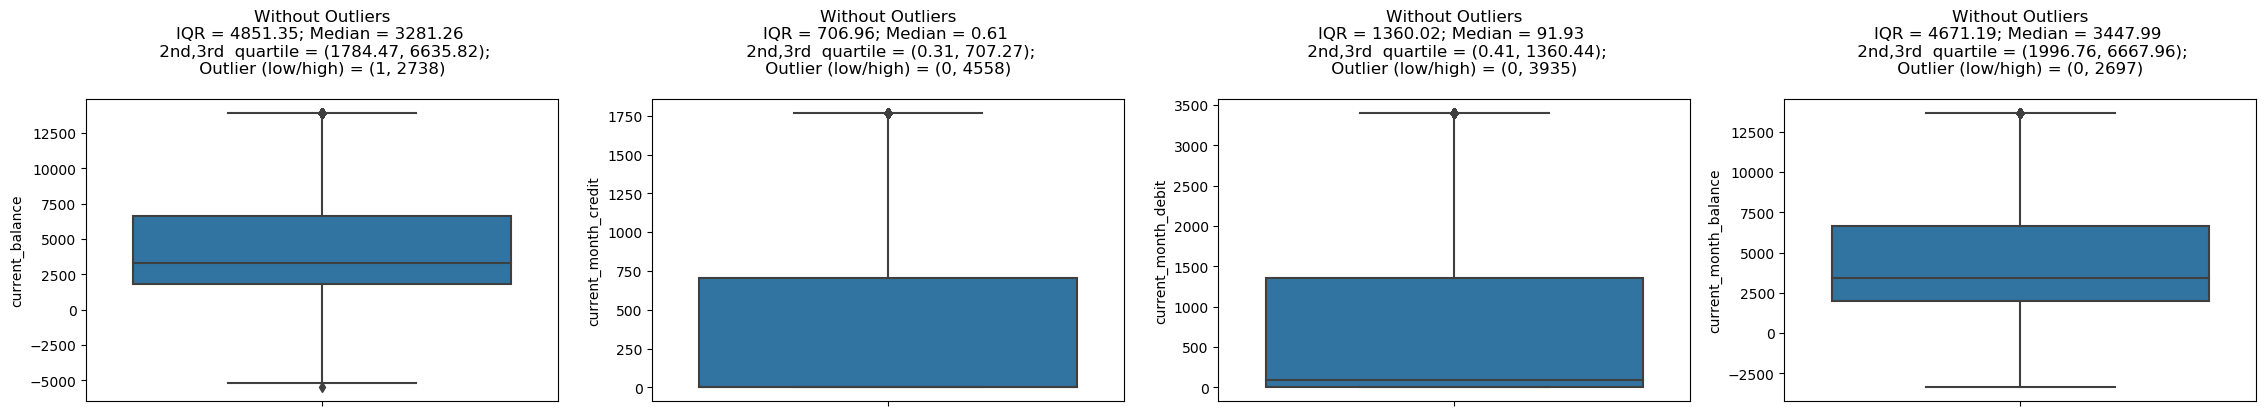

In [28]:
UVA_outlier(data, current_details, include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

## Previous Quarter

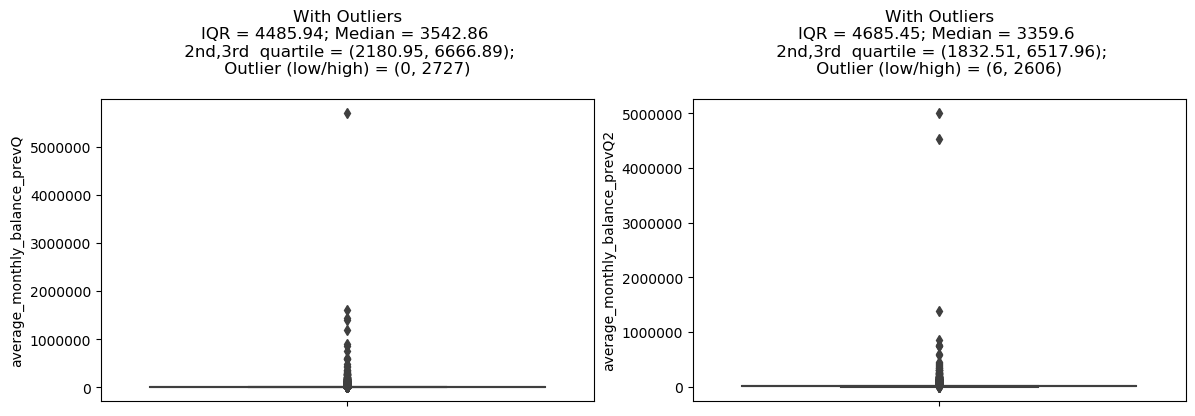

In [29]:
UVA_outlier(data, previous_quarters)

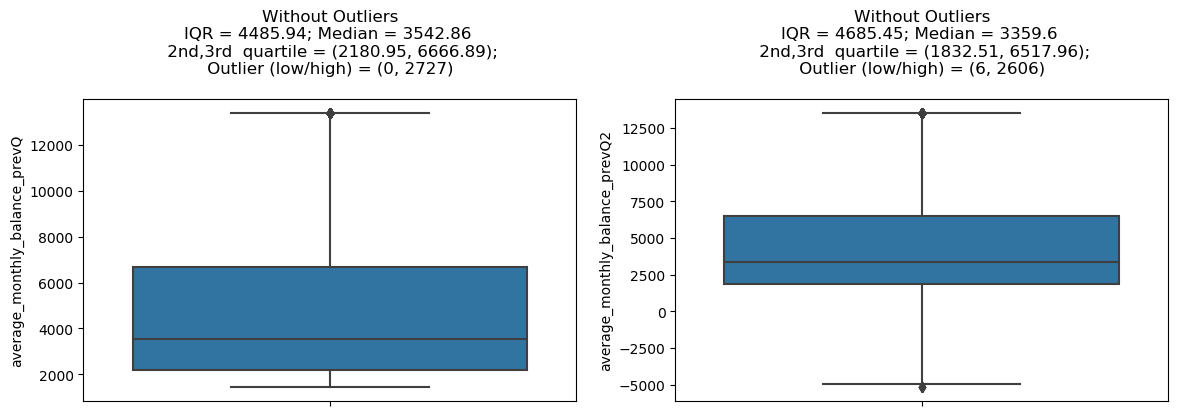

In [30]:
UVA_outlier(data, previous_quarters, include_outlier=False)

Summary:
* Outliers in previous two quarters are very similar but significantly large in number.

## Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.


# Bivariate Analysis
## Numerical Features

In [31]:
numerical = data.select_dtypes(include=['int64','Int64','float64'])[:]
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   dependents                      25919 non-null  float64
 4   current_balance                 28382 non-null  float64
 5   previous_month_end_balance      28382 non-null  float64
 6   average_monthly_balance_prevQ   28382 non-null  float64
 7   average_monthly_balance_prevQ2  28382 non-null  float64
 8   current_month_credit            28382 non-null  float64
 9   previous_month_credit           28382 non-null  float64
 10  current_month_debit             28382 non-null  float64
 11  previous_month_debit            28382 non-null  float64
 12  current_month_balance           

## Correlation Matrix

In [32]:
# calculating correlation
correlation = numerical.corr()
correlation

,customer_id,vintage,age,dependents,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,days_since_last_transaction,doy_lst_tran,woy_lst_tran,moy_lst_tran,dow_lst_tran
customer_id,1.000000,-0.007750,-0.000442,-0.008616,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,0.005807,-0.010550,0.007208,-0.009882,0.008990
vintage,-0.007750,1.000000,0.006220,0.005192,0.000031,-0.000669,-0.002054,-0.001759,-0.004617,-0.000169,-0.004978,-0.006760,-0.000550,-0.002208,0.002728,-0.004435,-0.012589,-0.005372,-0.008596
age,-0.000442,0.006220,1.000000,-0.000612,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.022530,0.016642,0.003852,0.017257,-0.017958
dependents,-0.008616,0.005192,-0.000612,1.000000,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,-0.105563,0.079740,0.034460,0.077978,-0.001702
current_balance,0.006589,0.000031,0.054346,-0.003070,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.021531,0.019978,-0.000374,0.019094,0.003441
previous_month_end_balance,0.005819,-0.000669,0.058342,0.000216,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,-0.017525,0.014381,0.003973,0.014125,0.004301
average_monthly_balance_prevQ,0.004485,-0.002054,0.061708,0.001213,0.958307,0.970530,1.000000,0.763495,0.033639,0.085699,0.060579,0.121272,0.976290,0.994038,-0.016475,0.012688,0.002552,0.012721,0.003469
average_monthly_balance_prevQ2,-0.002532,-0.001759,0.059607,0.002949,0.714600,0.722998,0.763495,1.000000,0.036271,0.062264,0.045239,0.102519,0.725826,0.736635,-0.008752,0.006363,-0.012678,0.005499,-0.002391
current_month_credit,0.002494,-0.004617,0.023840,0.003260,0.030371,0.032493,0.033639,0.036271,1.000000,0.168561,0.937021,0.135729,0.034182,0.038254,-0.034125,0.033129,0.010479,0.031521,0.000947
previous_month_credit,-0.006414,-0.000169,0.029961,0.025054,0.061754,0.114222,0.085699,0.062264,0.168561,1.000000,0.165092,0.733953,0.085320,0.108496,-0.077343,0.071645,0.019146,0.068229,-0.007766


## Heatmap

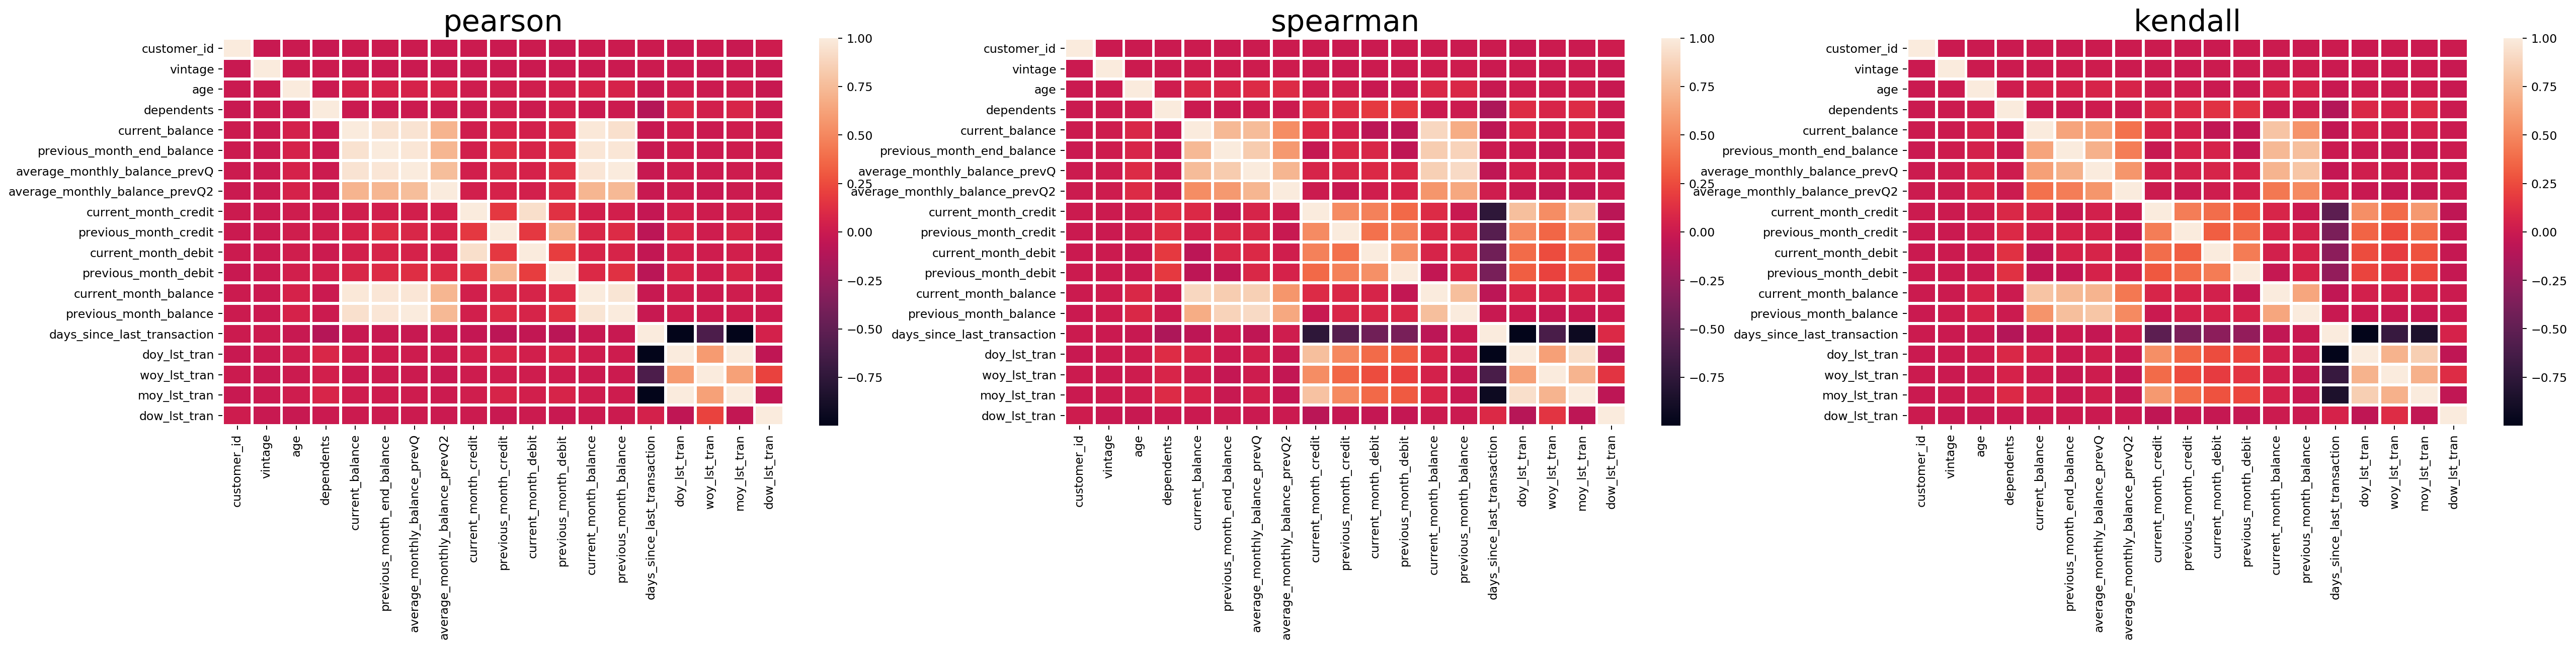

In [33]:
# plotting heatmap using all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=170)
for j,i in enumerate(['pearson','spearman','kendall']):
    plt.subplot(1,3,j+1)
    correlation = numerical.corr(method=i)
    sns.heatmap(correlation, linewidth=2)
    plt.title(i,fontsize=25)

## Summary:
* **kendall** and **spearman** correlations seems to have very similar pattern between them, except the slight variation in magnitude of correlation.
* Too many variables with insignificant correlation.
* Major correlation lies between the transaction variables and balance variables.

## Plotting heatmap on the transaction variables and balance variables

In [34]:
#extracting heatmap using all methods for all transaction variables
var = []
var.extend(current_details)
var.extend(previous_details)
var.extend(previous_quarters)

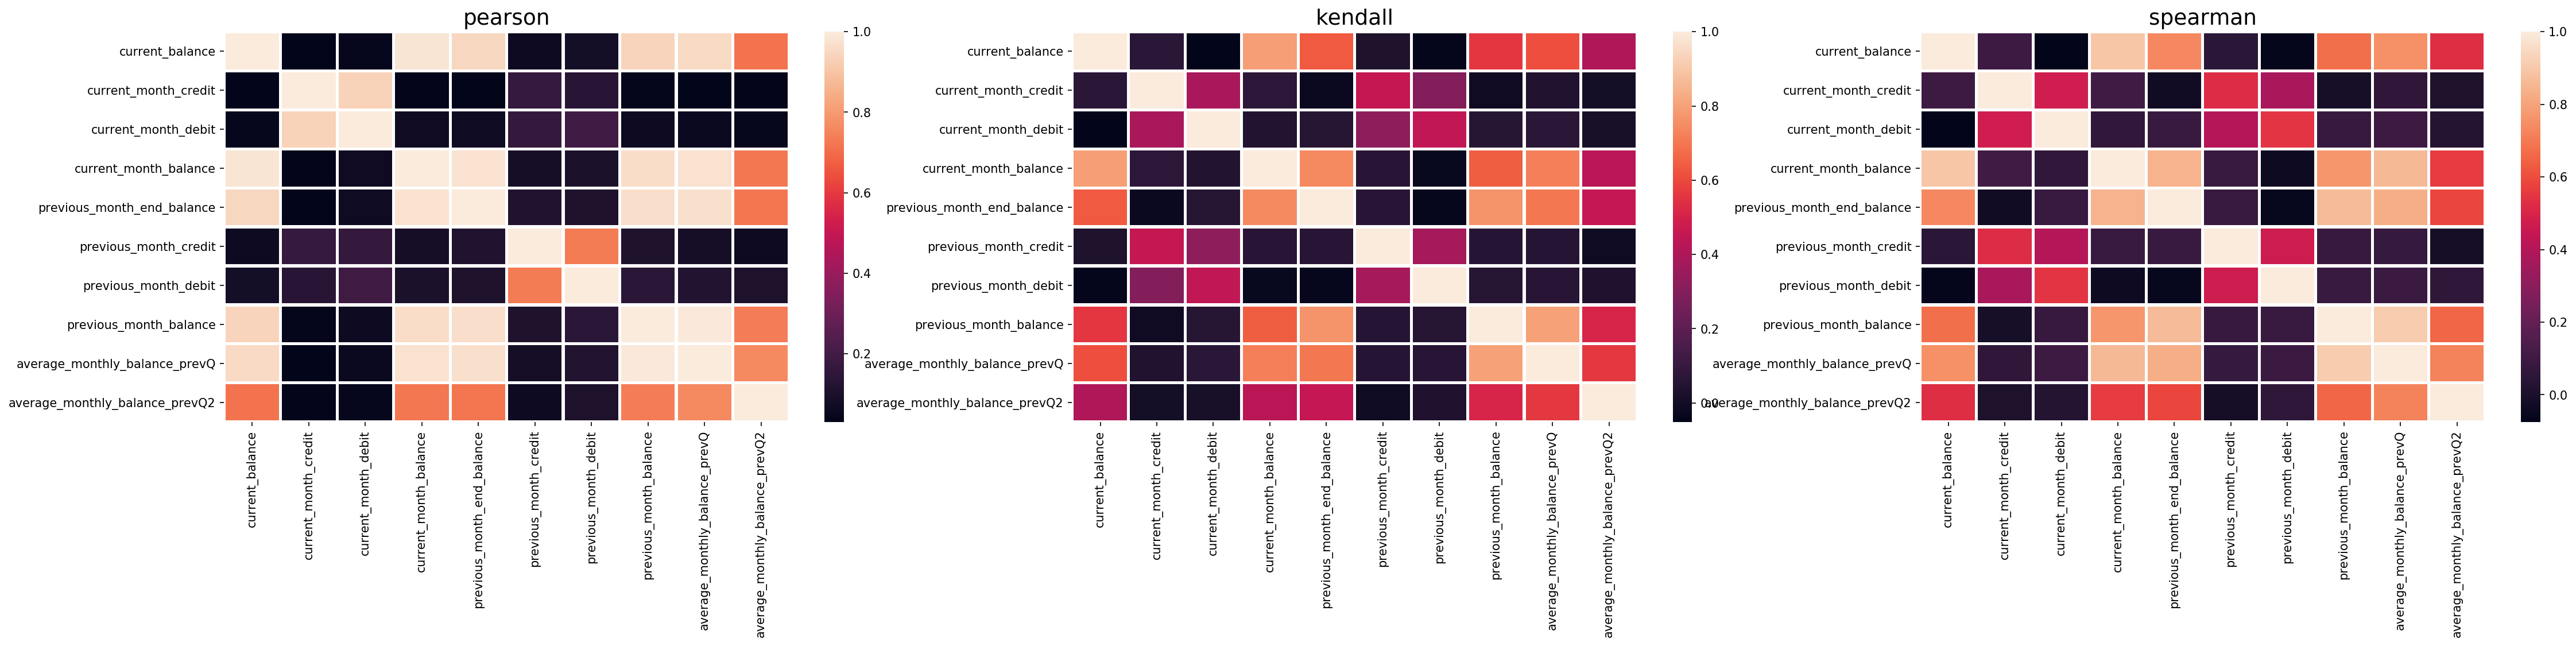

In [35]:
#plotting heatmap on transaction details and balance on current and previous months
plt.figure(figsize=(36,6),dpi=150)
for j,i in enumerate(['pearson','kendall','spearman']):
    plt.subplot(1,3,j+1)
    correlation=numerical[var].corr(method=i)
    sns.heatmap(correlation,linewidth=2)
    plt.title(i,fontsize=18)

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.

## Scatterplot

In [36]:
#grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']

<Figure size 840x560 with 0 Axes>

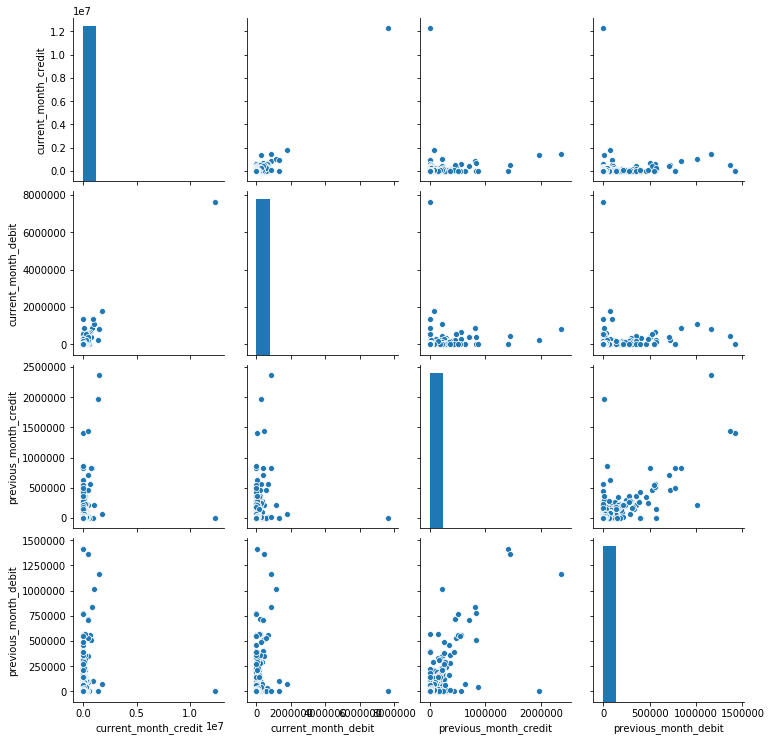

In [37]:
# scatter plot for transactional data
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

* This scatterplot isn't meaningful due to the presence of outliers

In [38]:
# taking log of every value to negate outliers

for column in var:
    mini = 1
    if numerical[column].min()<0:
        mini = abs(numerical[column].min())+1
    numerical[column] = [i+mini for i in numerical[column]]
    numerical[column] = numerical[column].map(lambda x: np.log(x))

<Figure size 840x560 with 0 Axes>

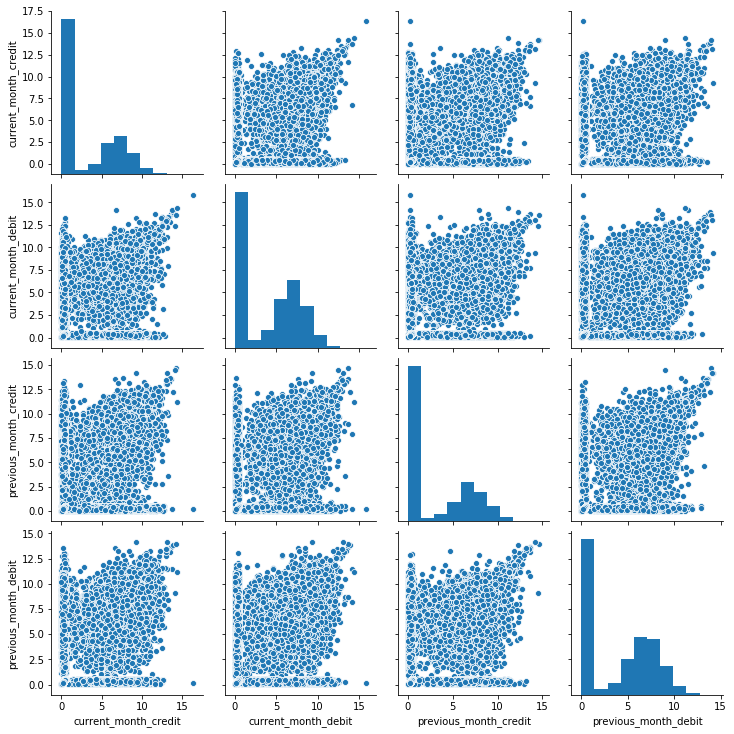

In [39]:
# scattreplot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

## Summary
* This pairplot validates the high correlation between the transaction variables
* This high correlation can be used for feature engineering during the later stages.

<Figure size 840x560 with 0 Axes>

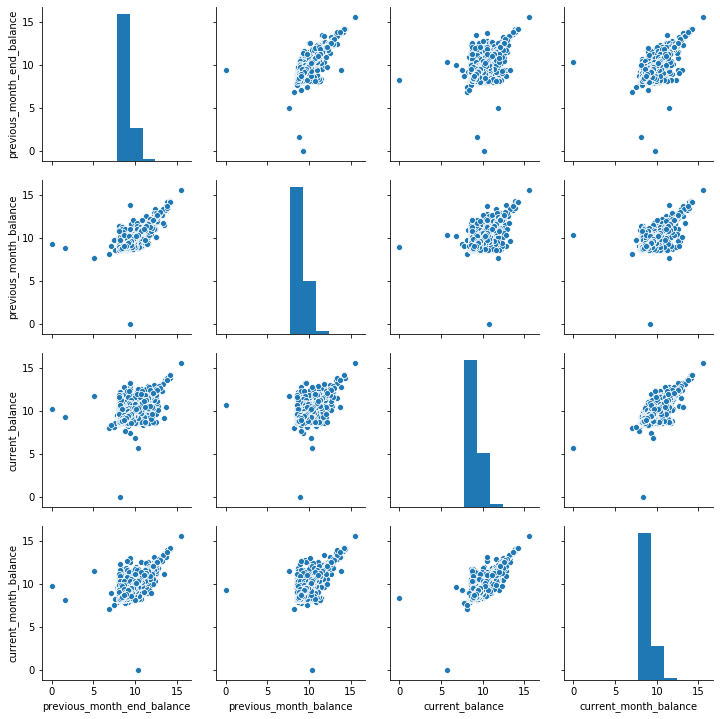

In [40]:
#Scatterplot for balance
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

## Summary:
* This pairplot infers that the balance variables has strong correlation
* This high correlation can be used for feature engineering during the later stages.


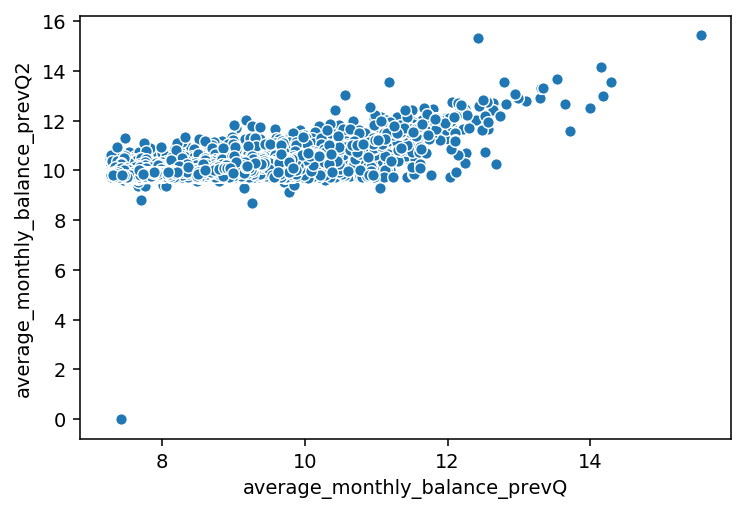

In [41]:
# previous quarters
plt.figure(dpi=140)
sns.scatterplot(x=numerical['average_monthly_balance_prevQ'], y=numerical['average_monthly_balance_prevQ2'])

# Multivariate Analysis:
## Pivot Table:
We are using Pivot Table to comply with the objective of identifying the churning customers profile using multiple categorical features. First, let's use Gender, Occupationn and Customer Net Worth Category and derive insights from the Pivot Table

## Gender, Occupation, Customer Net Worth Category with churn

In [42]:
# As, pivottable doesn't suppot category datatype,
# we'll convert all the category datatype into object datatype

data[['gender','occupation','customer_nw_category']] = data[['gender','occupation','customer_nw_category']].astype('object')
data['churn']=data['churn'].astype('int64')
data['city']=data['city'].astype('float64')
data['branch_code']=data['branch_code'].astype('float64')

In [43]:
data.pivot_table('churn',['gender','occupation'], 'customer_nw_category', aggfunc='mean')

customer_nw_category         1         2         3
gender occupation                                 
Female company        1.000000  0.000000  0.666667
       retired        0.206897  0.112195  0.134921
       salaried       0.185455  0.148492  0.176890
       self_employed  0.181116  0.181970  0.189209
       student        0.104046  0.144424  0.150350
Male   company        0.000000  0.000000  0.000000
       retired        0.184971  0.142518  0.163166
       salaried       0.175573  0.164105  0.184687
       self_employed  0.228324  0.204250  0.214658
       student        0.169697  0.172101  0.182090

* **Highest number of churning customers** are those **Male customers** who lie in the **1st Net worth category** and belong to **Self-employed** profession.
* Proportion wise, the **lowest number of churning customers** are those **Female Students** who lie in the **1st net worth category**.
* This would be interesting to dig deeper and found out if the **"Self-employed Male"** Customers are more churning more.

## Gender, Age, Occupation with Churning Status
Age is a continuous variable **AGE**, and two categorical variables, **Gender** and **Occupation** to deprive insights related to profiles of customers whoa re churning.  We will have to convert continuous varibales into categorical variable for efficiently using Pivot Table. Here we are binning age into three intervals

In [44]:
age = pd.cut(data['age'],[0,25,50,100])
data.pivot_table('churn',['gender',age], 'occupation', aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]        NaN      NaN       7.0           27.0    102.0
       (25, 50]       2.0      0.0     226.0          852.0     38.0
       (50, 100]      1.0     52.0      70.0          605.0      0.0
Male   (0, 25]        0.0      NaN      17.0           74.0    137.0
       (25, 50]       0.0      2.0     563.0         1107.0     47.0
       (50, 100]      0.0    251.0     264.0          698.0      0.0

## Summary:
* From the pivot table, it's obvious that **Self-employed Male aged greater than 25 and less than or equal to 50** are prone to churn.
* In general **Male Students** are more liking to churn than **Female Students**

## Gender, Age, Occupation and Current Balance with Churning Status
   It'll be more efficient to dig deeper using 2 continuous variables **Age** and **Current balance** , categorical variables **Gender** and **Occupation** with using **Churn** 

In [45]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn',['gender',age],[balance,'occupation'],aggfunc='mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

## Summary:
* **Male self-employed whose age under 25** is more prone to chur
* With the increament of age, the proportion churning customers in self-employed male decreases.
* In general **Male customers are more prone to churn thsn female customers**.
* **Customers with lower current balance** are churning more than other type of customers.

## Boxplot
Now in order to comply with our objective of identifying churning customers profile we will use grouped Box Plot.

In [46]:
def grouped_box_plot(data, cont, cat1, cat2):
    #boxplot
    plt.figure(dpi=150)
    sns.boxplot(x=cat1,y=cont,hue=cat2,data=data,orient='v')
    plt.title(f'Boxplot on {cat1} at different types of {cat2}')

## Age, Occupation, Churn
We are using 1 continuous variable **Age** and 1 categorical variable occupation to derive insights related to churning customers profile.

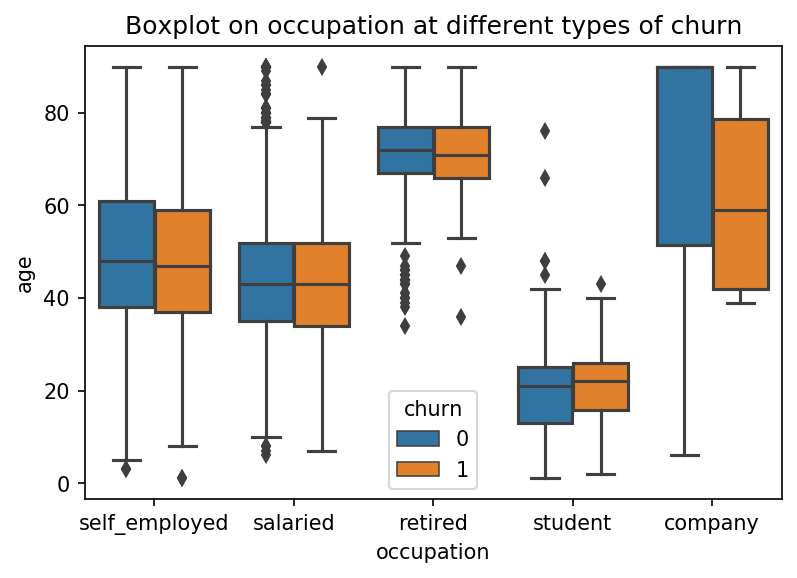

In [47]:
grouped_box_plot(data, 'age', 'occupation', 'churn')

## Summary:
* We can notice here that
    * In retired occupation for non churning cutomers, there are many outliers that indicate young people who retire early are not charning.
    * For **Self employed customers** in churning category has highest range of age, i.e. the dataset has record refering to the fact that **self-employed of any age may churn**
    
## Vintage, Gender, Churn
It's also important to know the significance of vintage on churning profile of customers gender wise so let's vintage and gender to derive insights for churning customers.

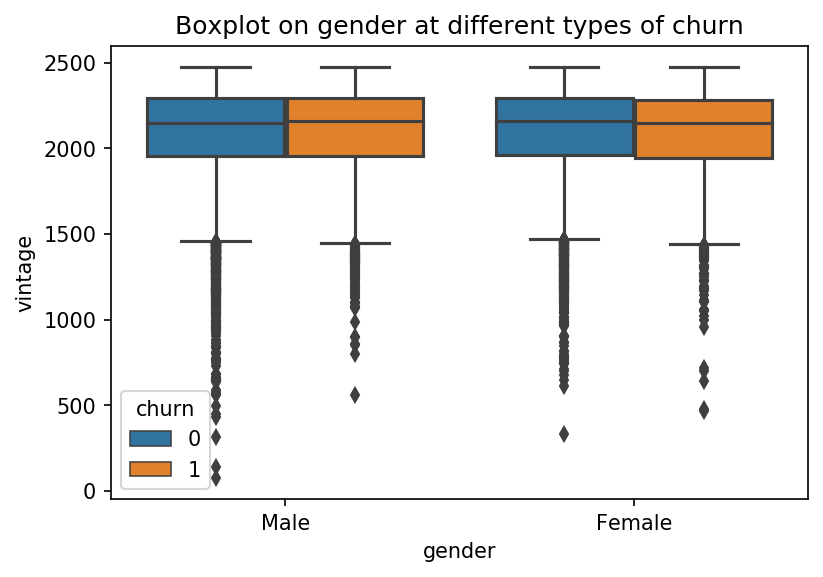

In [48]:
grouped_box_plot(data, 'vintage', 'gender', 'churn')

## Summary:
* Male and female customers have almost same boxplot which refers same pattern in them
* The number of outliers in Male not chuning category, which refers that there is comparatively high quantity of male customers whose vintage is low, hadn't churn.

## Pair Plot:
**Churn vs. Current & Previous month balances**
Now, we'll check the relationship of the some transactional variables along with the churning status. Here conversion to log is important as we have a lot of outliers and visualization will be difficult.

In [49]:
balance_cols = ['current_balance','previous_month_balance',
                'current_month_balance','previous_month_end_balance']
balance_df = data[balance_cols].apply(lambda x: np.log(x+6000))

In [50]:
balance_df.head()

,current_balance,previous_month_balance,current_month_balance,previous_month_end_balance
0,8.917138,8.917138,8.917138,8.917138
1,9.340524,9.601545,9.433226,9.595920
2,9.201618,9.312007,9.306221,9.377150
3,9.023036,8.945045,9.023036,9.023036
4,8.843286,8.946005,8.875867,8.909468


In [51]:
balance_df['churn'] = data['churn']

**Though the column-names aren't changed, but I've included -**
* log oc current balance & previous month end balance
* log of average monthly balance of current and previous month
* Churn is represented by the colour here(Orange - Churn, Blue - Not Churn)

Now the task is to plot the pairplot:

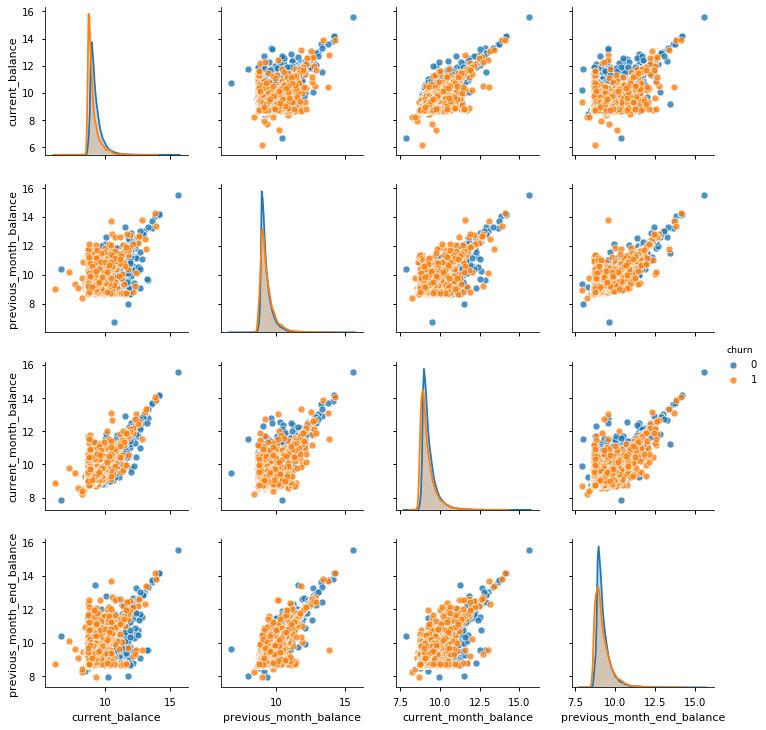

In [52]:
plt.style.use('seaborn-notebook')
sns.pairplot(balance_df, vars=balance_df.drop(['churn'],axis=1).columns,hue='churn',plot_kws={'alpha':0.8})
plt.show()

The distribution for these features look similar. We can make the following conclusions from this:
* There is high correlation between the previous and current month balances which is expected
* The distribution for churn and not churn is slightly different for both the cases

### Credit and Debits for current and previous months

Total credit and debit amounts for the current and previous can be clubbed into the same category. Let us again use the pair plot to check distributions and scatter plots.

In [53]:
cr_dr_cols = ['current_month_credit','previous_month_credit',
              'current_month_debit', 'previous_month_debit']

numerical =  pd.DataFrame()
for i in cr_dr_cols:
    numerical[str('log_')+i] = np.log(data[i]+6000)
numerical['churn'] = data['churn']
numerical.head()

,log_current_month_credit,log_previous_month_credit,log_current_month_debit,log_previous_month_debit,churn
0,8.699548,8.699548,8.699548,8.699548,0
1,8.699608,8.699608,9.348908,8.716136,0
2,8.699616,8.699616,9.396549,8.741812,0
3,8.699593,8.699593,8.699593,9.004954,1
4,8.699570,8.812041,8.793099,8.927720,1


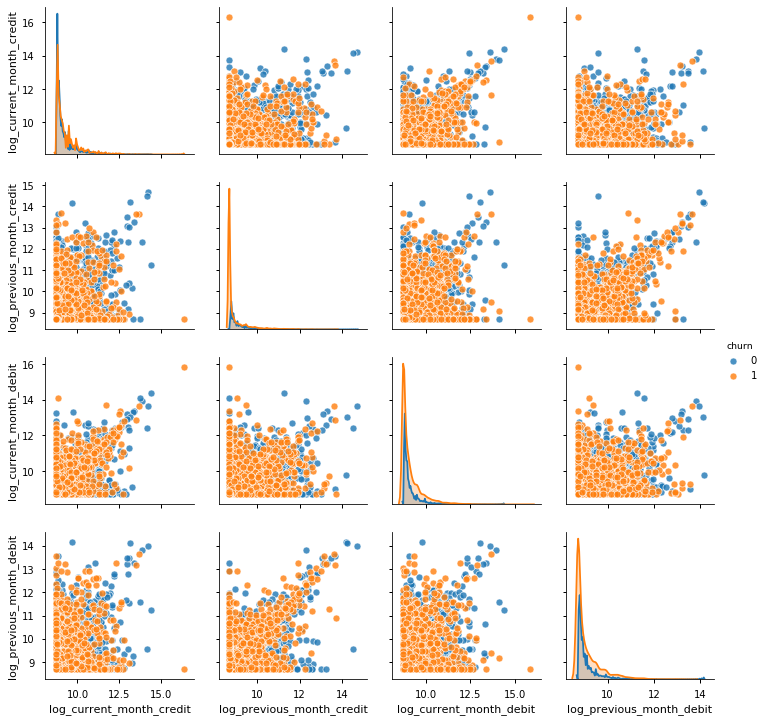

In [54]:
sns.pairplot(numerical,vars=numerical.drop(['churn'],axis=1).columns,hue='churn',plot_kws={'alpha':0.8})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might turn out to be an important feature

## Treating missing values of nominal categorical features

In [55]:
cat_col = ['gender','city','occupation','dependents']

In [56]:
from sklearn.impute import SimpleImputer
imputer_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data[cat_col] = imputer_cat.fit_transform(data[cat_col])
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          28382 non-null  object 
 4   dependents                      28382 non-null  float64
 5   occupation                      28382 non-null  object 
 6   city                            28382 non-null  float64
 7   customer_nw_category            28382 non-null  object 
 8   branch_code                     28382 non-null  float64
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

* Hence, imputation of the missing values using the mode of the feature.

In [57]:
# Deleting all the rows having missing values
data.dropna(axis=0, how='any', inplace=True)

In [58]:
data.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
days_since_last_transaction       0
doy_lst_tran                      0
woy_lst_tran                      0
moy_lst_tran                      0
dow_lst_tran                      0
dtype: int64

* Hence, our dataframe has no missing values now.

## Feature Transform
In this section, all the string values will transformed into numerical features for feeding the random forest model

1. gender

In [59]:
data['gender'].value_counts()

Male      15348
Female     9811
Name: gender, dtype: int64

In [60]:
from sklearn.preprocessing import LabelEncoder
data['gender'] = LabelEncoder().fit_transform(data['gender'])
data['gender'].value_counts()

1    15348
0     9811
Name: gender, dtype: int64

2. occupation

In [61]:
data['occupation'].value_counts()

self_employed    15652
salaried          6065
retired           1785
student           1623
company             34
Name: occupation, dtype: int64

In [62]:
data['occupation'] = LabelEncoder().fit_transform(data['occupation'])
data['occupation'].value_counts()

3    15652
2     6065
1     1785
4     1623
0       34
Name: occupation, dtype: int64

3. customer_nw_category

In [63]:
data['customer_nw_category'] = data['customer_nw_category'].astype('int64')

## Removing the unnecessary feature

In [64]:
data.drop(columns=['last_transaction'], inplace=True)

## Skimming through the DataFrame

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25159 entries, 0 to 28381
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     25159 non-null  int64  
 1   vintage                         25159 non-null  int64  
 2   age                             25159 non-null  int64  
 3   gender                          25159 non-null  int32  
 4   dependents                      25159 non-null  float64
 5   occupation                      25159 non-null  int32  
 6   city                            25159 non-null  float64
 7   customer_nw_category            25159 non-null  int64  
 8   branch_code                     25159 non-null  float64
 9   current_balance                 25159 non-null  float64
 10  previous_month_end_balance      25159 non-null  float64
 11  average_monthly_balance_prevQ   25159 non-null  float64
 12  average_monthly_balance_prevQ2  

## Creating new .csv file

In [66]:
data.to_csv('churn_data_simple.csv')
'.csv file created!'

'.csv file created!'